# 📊 Campus Recruitment Prediction

## 📌 Overview
This is a Machine Learning classification challenge in the context of the course *Artificial Intelligence* at Thomas More.  
The goal is to predict **whether a student will be recruited for a job**.  
Additionally, we will also predict the **starting salary** as a secondary (bonus) task.

Install the following libraries in order to start.

In [113]:
!pip install graphviz pydotplus scikit-learn pandas numpy matplotlib seaborn imblearn xgboost

You should consider upgrading via the 'C:\Users\mohah\Desktop\AI\ML_T10\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline


## 📂 Available Data  
We have three datasets:  
- **Sample data:** `sample_submission.csv`  
- **Test data:** `test_campusrecruit.csv`  
- **Training data:** `train_campusrecruit.csv`  

## 🔍 Exploratory Data Analysis (EDA)  
Before modeling, we analyze the dataset to find patterns, missing values, and correlations.

In [115]:
# Load the data
sample_submission = 'Resources/sample_submission.csv'
test_campusrecruit = 'Resources/test_campusrecruit.csv'
train_campusrecruit = 'Resources/train_campusrecruit.csv'

ss = pd.read_csv(sample_submission)
test_cr = pd.read_csv(test_campusrecruit)
train_cr = pd.read_csv(train_campusrecruit)

printing the first 5 rows of each dataset


In [116]:
print("\nTest Campus Recruit:")
print(test_cr.head())


Test Campus Recruit:
    id gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0  655      M  82.34   Others  66.04   Others  Commerce     71.50  Comm&Mgmt   
1  910      M  66.75   Others  44.96   Others  Commerce     53.47  Comm&Mgmt   
2  447      M  67.86   Others  69.44  Central   Science     83.54  Comm&Mgmt   
3  324      M  52.05   Others  53.75   Others   Science     55.66  Comm&Mgmt   
4  178      M  61.80  Central  59.40  Central   Science     64.12  Comm&Mgmt   

  workex  etest_p specialisation  mba_p  
0    Yes    65.98        Mkt&Fin  65.42  
1     No    91.46         Mkt&HR  61.15  
2     No    59.70        Mkt&Fin  63.60  
3     No    58.31        Mkt&Fin  63.91  
4    Yes    61.90        Mkt&Fin  59.93  


In [117]:
print("\nTrain Campus Recruit:")
print(train_cr.head())


Train Campus Recruit:
    id gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0   61      M  61.84   Others  57.93   Others   Science     68.03   Sci&Tech   
1  273      M  63.06  Central  75.61  Central  Commerce     63.40  Comm&Mgmt   
2  489      M  76.34  Central  63.37  Central   Science     71.33   Sci&Tech   
3  721      M  54.12   Others  65.47   Others  Commerce     73.83  Comm&Mgmt   
4   95      M  63.12   Others  68.94  Central  Commerce     66.08  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No    60.60         Mkt&HR  55.10  Not Placed       0.0  
1    Yes    62.33         Mkt&HR  54.69      Placed  424507.0  
2     No    53.98         Mkt&HR  53.03      Placed  200000.0  
3    Yes    62.09        Mkt&Fin  58.87  Not Placed       0.0  
4    Yes    71.99         Mkt&HR  67.01      Placed  327148.0  


Check for missing values

In [118]:
print("\nMissing Values in Training Data:")
print(train_cr.isnull().sum())


Missing Values in Training Data:
id                  0
gender            300
ssc_p             300
ssc_b             300
hsc_p             300
hsc_b             300
hsc_s             300
degree_p          300
degree_t          300
workex            300
etest_p           300
specialisation    300
mba_p             300
status            300
salary              0
dtype: int64


Summary statistics for numerical columns

In [119]:
print("\nSummary Statistics:")
print(train_cr.describe())


Summary Statistics:
                id       ssc_p       hsc_p    degree_p     etest_p  \
count  1000.000000  700.000000  700.000000  700.000000  700.000000   
mean    499.500000   66.610957   65.880457   66.370743   72.048686   
std     288.819436   11.216839   10.968154    7.644842   13.739664   
min       0.000000   40.890000   37.000000   50.000000   50.000000   
25%     249.750000   58.927500   59.432500   61.587500   60.022500   
50%     499.500000   66.465000   65.460000   66.420000   70.940000   
75%     749.250000   75.077500   72.622500   71.392500   82.855000   
max     999.000000   89.400000   97.700000   91.000000   98.000000   

            mba_p         salary  
count  700.000000    1000.000000  
mean    62.434157  195593.581000  
std      6.229540  160103.314096  
min     51.210000       0.000000  
25%     57.660000       0.000000  
50%     62.120000  205582.500000  
75%     66.927500  294109.250000  
max     77.890000  940000.000000  


# Visualizing distributions of numerical features and correlation between features

<Figure size 1200x600 with 0 Axes>

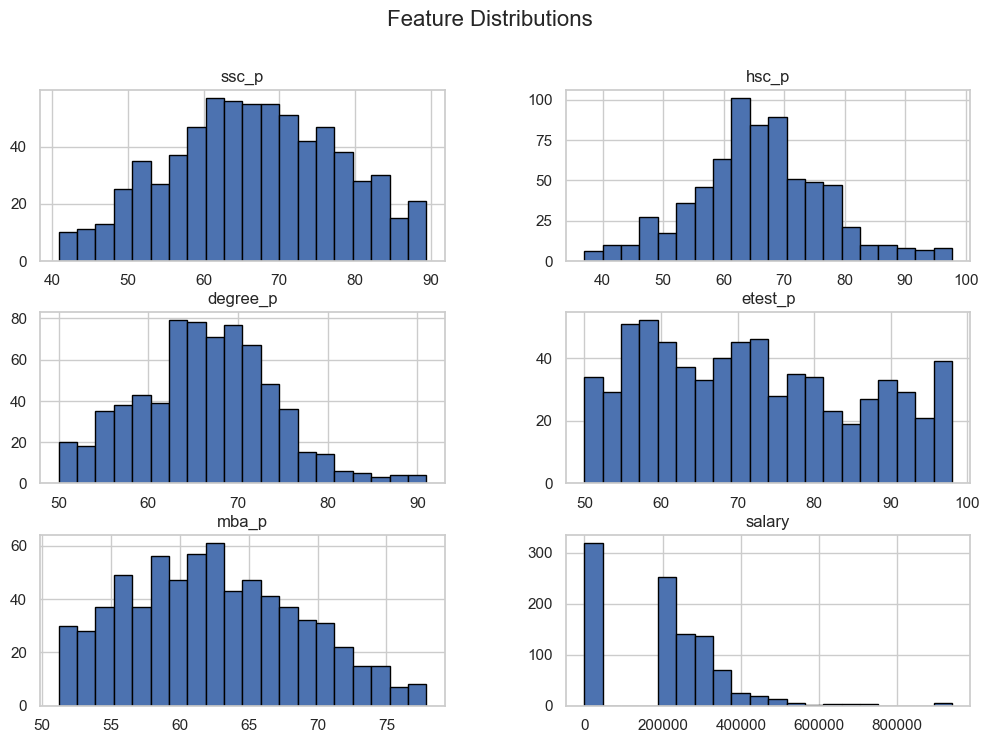

In [120]:
# Visualizing distributions of numerical features
plt.figure(figsize=(12, 6))
train_cr.drop(columns=['id', 'gender', 'workex']).hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### Feature Distributions Breakdown

Below is an analysis of the distributions of different numerical features in the dataset:

- **ssc_p (10th grade percentage)**: Appears to be roughly normally distributed, with most students scoring between **50-90%**.
- **hsc_p (12th grade percentage)**: Similar to `ssc_p`, but slightly right-skewed, meaning more students have **higher scores**.
- **degree_p (Undergraduate percentage)**: Shows a peak around **60-80%**, indicating most students fall within this range.
- **etest_p (Employability test percentage)**: Displays an irregular distribution with multiple peaks, suggesting certain score ranges are more common.
- **mba_p (MBA percentage)**: Mostly normal distribution, with scores concentrated between **50-75%**.
- **salary**: Strongly **right-skewed**, meaning most students have **lower salaries**, but a few have **extremely high salaries** (potential outliers).

## Placement Status Distribution

C:\Users\mohah\AppData\Local\Temp\ipykernel_14756\1859445492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_cr['status'], palette='coolwarm')


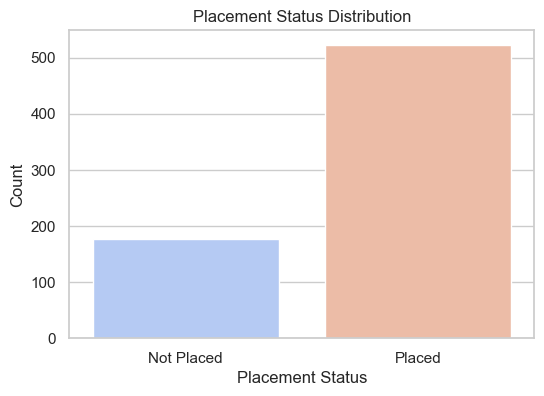

In [121]:
plt.figure(figsize=(6,4))
sns.countplot(x=train_cr['status'], palette='coolwarm')
plt.title("Placement Status Distribution")
plt.xlabel("Placement Status")
plt.ylabel("Count")
plt.show()

The chart shows that a significantly higher number of students have been placed compared to those who have not. This suggests that the majority of students in the dataset successfully secured placements.

## Effect of Degree Percentage on Placement

C:\Users\mohah\AppData\Local\Temp\ipykernel_14756\706687089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='degree_p', data=train_cr, palette='muted')


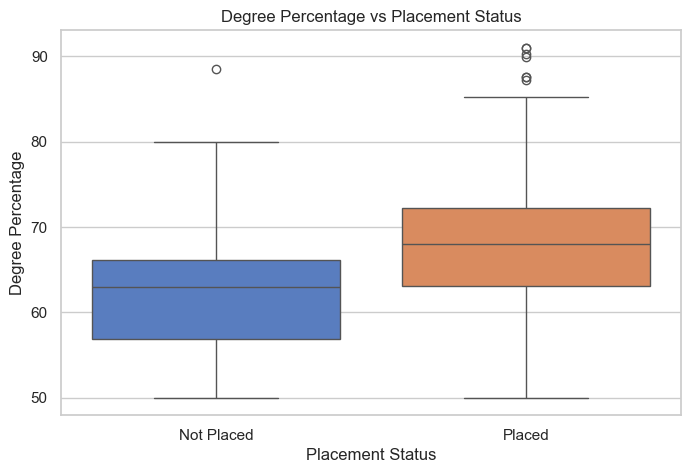

In [122]:
plt.figure(figsize=(8,5))
sns.boxplot(x='status', y='degree_p', data=train_cr, palette='muted')
plt.title("Degree Percentage vs Placement Status")
plt.xlabel("Placement Status")
plt.ylabel("Degree Percentage")
plt.show()


The box plot indicates that students with higher degree percentages are more likely to be placed. The median degree percentage for placed students is higher compared to those who were not placed. Additionally, there are more outliers on the higher end for placed students, suggesting that exceptional academic performance increases placement chances.

## Work Experience Impact on Placement

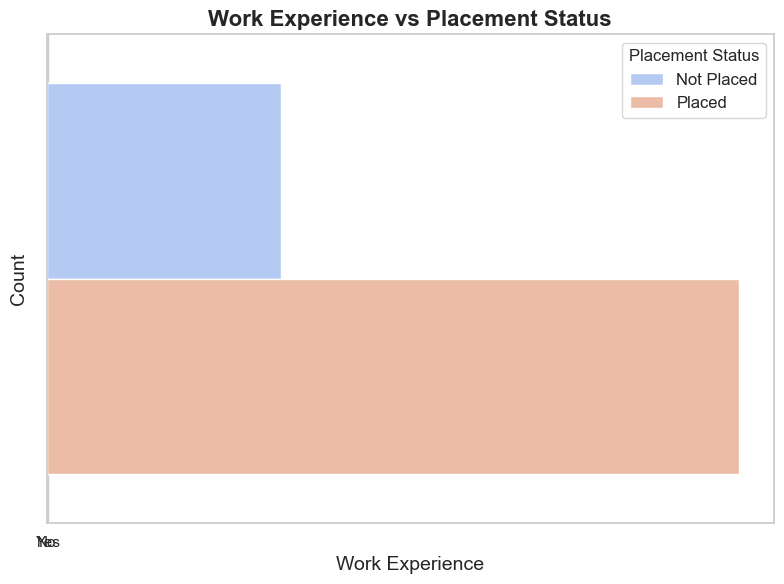

In [123]:
plt.figure(figsize=(8, 6))
sns.barplot(x='workex', hue='status', data=train_cr, palette='coolwarm', estimator=lambda x: len(x))
plt.title("Work Experience vs Placement Status", fontsize=16, fontweight='bold')
plt.xlabel("Work Experience", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Placement Status", title_fontsize=12, loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

The bar chart shows that students with prior work experience have a higher chance of getting placed compared to those without experience. While students without work experience still get placed in significant numbers, the proportion of placements is higher among those with work experience. This suggests that having prior work experience can be a valuable factor in securing job placements.

### Check for missing values in the dataset


In [124]:
train_cr.isnull().sum()

id                  0
gender            300
ssc_p             300
ssc_b             300
hsc_p             300
hsc_b             300
hsc_s             300
degree_p          300
degree_t          300
workex            300
etest_p           300
specialisation    300
mba_p             300
status            300
salary              0
dtype: int64

Remove rows with missing values


In [125]:
train_cr = train_cr.dropna()


Fill missing values with the column mean (for numeric columns)


In [126]:
train_cr = train_cr.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' else x, axis=0)

label_encoder = LabelEncoder()
train_cr['gender'] = label_encoder.fit_transform(train_cr['gender'])
train_cr['workex'] = label_encoder.fit_transform(train_cr['workex'])

train_cr = pd.get_dummies(train_cr, columns=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation'], drop_first=True)


print(train_cr.head())

    id  gender  ssc_p  hsc_p  degree_p  workex  etest_p  mba_p      status  \
0   61       1  61.84  57.93     68.03       0    60.60  55.10  Not Placed   
1  273       1  63.06  75.61     63.40       1    62.33  54.69      Placed   
2  489       1  76.34  63.37     71.33       0    53.98  53.03      Placed   
3  721       1  54.12  65.47     73.83       1    62.09  58.87  Not Placed   
4   95       1  63.12  68.94     66.08       1    71.99  67.01      Placed   

     salary  ssc_b_Others  hsc_b_Others  hsc_s_Commerce  hsc_s_Science  \
0       0.0          True          True           False           True   
1  424507.0         False         False            True          False   
2  200000.0         False         False           False           True   
3       0.0          True          True            True          False   
4  327148.0          True         False            True          False   

   degree_t_Others  degree_t_Sci&Tech  specialisation_Mkt&HR  
0            False     

### Splitting the Data and Building a Baseline Model

Now that our data is preprocessed, we can split it into training and testing sets. This allows us to train our model on one portion of the data and evaluate it on another to check for overfitting.

We'll use the target variable `status` (which indicates whether the student was placed) for classification. In this example, we'll build a baseline model using the Random Forest classifier.


In [127]:
X = train_cr.drop('status', axis=1)
y = train_cr['status']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Check the content of X and y.

In [128]:
print(X)

      id  gender  ssc_p  hsc_p  degree_p  workex  etest_p  mba_p    salary  \
0     61       1  61.84  57.93     68.03       0    60.60  55.10       0.0   
1    273       1  63.06  75.61     63.40       1    62.33  54.69  424507.0   
2    489       1  76.34  63.37     71.33       0    53.98  53.03  200000.0   
3    721       1  54.12  65.47     73.83       1    62.09  58.87       0.0   
4     95       1  63.12  68.94     66.08       1    71.99  67.01  327148.0   
..   ...     ...    ...    ...       ...     ...      ...    ...       ...   
695  631       1  62.71  52.58     50.78       1    50.00  58.18       0.0   
696  435       1  87.73  78.47     67.99       1    58.93  64.74  258407.0   
697  524       1  58.07  58.27     57.83       0    79.80  52.27  200000.0   
698  790       1  55.22  65.33     61.89       1    62.71  54.43       0.0   
699  805       1  64.30  68.00     75.46       0    98.00  67.97  307375.0   

     ssc_b_Others  hsc_b_Others  hsc_s_Commerce  hsc_s_Science 

In [129]:
print(y)

0      Not Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
695        Placed
696        Placed
697        Placed
698        Placed
699        Placed
Name: status, Length: 700, dtype: object


### Create and train a Random Forest classifier

In [130]:
brf_clf = BalancedRandomForestClassifier(random_state=42)
brf_clf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=42)

### Pipeline Creation

In [131]:
# Define the pipeline with scaling, SMOTE, and RandomForest
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('rf', BalancedRandomForestClassifier(random_state=42))
])

- **StandardScaler**: Standardizes the features by scaling them to have a mean of 0 and a standard deviation of 1.
- **SMOTE**: Balances the dataset by generating synthetic samples for the minority class.
- **BalancedRandomForestClassifier**: Trains a random forest model on the balanced dataset to classify the data, adjusting for class imbalance during training.


### Parameter Grid

In [132]:
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

The `param_grid` defines the hyperparameters for tuning the **BalancedRandomForestClassifier**:

- **`rf__n_estimators`**: Number of trees in the forest (100, 200, 300).
- **`rf__max_depth`**: Maximum depth of each tree (`None`, 10, 20, 30).
- **`rf__min_samples_split`**: Minimum samples required to split a node (2, 5, 10).
- **`rf__min_samples_leaf`**: Minimum samples required at a leaf node (1, 2, 4).

GridSearchCV will try all combinations to find the best model.



### Grid Search with Cross-Validation nd fitting the Grid Search

In [133]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('rf',
                                        BalancedRandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             verbose=2)

- **`GridSearchCV`**: Searches for the best hyperparameters using cross-validation.
  - **`estimator=pipeline`**: Uses the full pipeline (scaling, SMOTE, and RandomForest).
  - **`param_grid=param_grid`**: Tries different hyperparameter values.
  - **`cv=5`**: Uses 5-fold cross-validation.
  - **`n_jobs=-1`**: Uses all available CPU cores.
  - **`verbose=2`**: Shows detailed progress.

The `fit` method trains the model with the training data (`X_train` and `y_train`), testing all combinations of hyperparameters.


### Getting the best model and making the prediction

In [134]:
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)

- **`best_rf_clf = grid_search.best_estimator_`**: Retrieves the best model found by GridSearchCV with the optimal hyperparameters.
- **`y_pred = best_rf_clf.predict(X_test)`**: Uses the best model to make predictions on the test data (`X_test`).


### Evaluating the Model

In [135]:
# Evaluate the tuned model
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 93.57%

Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.83      1.00      0.91        44
      Placed       1.00      0.91      0.95        96

    accuracy                           0.94       140
   macro avg       0.92      0.95      0.93       140
weighted avg       0.95      0.94      0.94       140


Confusion Matrix:
[[44  0]
 [ 9 87]]
